## 0. Import Libraries

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from xclim import sdba

import xclim

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


https://xclim.readthedocs.io/en/stable/notebooks/sdba.html

In [2]:
t = xr.cftime_range("2000-01-01", "2030-12-31", freq="D", calendar="noleap")

In [3]:
vals = np.random.randint(0, 1000, size=(t.size,)) / 100
vals_ref = (4 ** np.where(vals < 9, vals / 100, vals)) / 3e6
vals_sim = (
    (1 + 0.1 * np.random.random_sample((t.size,)))
    * (4 ** np.where(vals < 9.5, vals / 100, vals))
    / 3e6
)

pr_ref = xr.DataArray(
    vals_ref, coords={"time": t}, dims=("time",), attrs={"units": "mm/day"}
)
pr_ref = pr_ref.sel(time=slice("2000", "2015"))
pr_sim = xr.DataArray(
    vals_sim, coords={"time": t}, dims=("time",), attrs={"units": "mm/day"}
)
pr_hist = pr_sim.sel(time=slice("2000", "2015"))

In [4]:
pr_hist

<xarray.DataArray (time: 5840)>
array([3.82309250e-07, 2.47231004e-01, 3.57477160e-07, ...,
       3.91664883e-07, 3.50336049e-07, 3.85657170e-07])
Coordinates:
  * time     (time) object 2000-01-01 00:00:00 ... 2015-12-31 00:00:00
Attributes:
    units:    mm/day

In [5]:
pr_sim

<xarray.DataArray (time: 11315)>
array([3.82309250e-07, 2.47231004e-01, 3.57477160e-07, ...,
       3.56126037e-07, 3.75042708e-07, 4.08203691e-07])
Coordinates:
  * time     (time) object 2000-01-01 00:00:00 ... 2030-12-31 00:00:00
Attributes:
    units:    mm/day

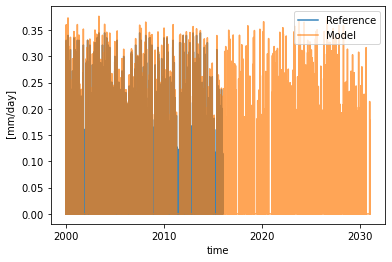

In [6]:
pr_ref.plot(alpha=0.9, label="Reference")
pr_sim.plot(alpha=0.7, label="Model")
plt.legend()

In [7]:
QM = sdba.EmpiricalQuantileMapping.train(pr_ref, pr_hist, nquantiles=15, kind="*", group="time")

In [8]:
scen = QM.adjust(pr_sim)

In [10]:
pr_sim

<xarray.DataArray (time: 11315)>
array([3.82309250e-07, 2.47231004e-01, 3.57477160e-07, ...,
       3.56126037e-07, 3.75042708e-07, 4.08203691e-07])
Coordinates:
  * time     (time) object 2000-01-01 00:00:00 ... 2030-12-31 00:00:00
Attributes:
    units:    mm d-1

In [18]:
scen_single = QM.adjust(pr_sim[-100:])

In [22]:
QM.ds.af

<xarray.DataArray 'af' (group: 1, quantiles: 15)>
array([[9.75031131e-01, 9.62698858e-01, 9.57974063e-01, 9.55625349e-01,
        9.53690951e-01, 9.54751877e-01, 9.54133927e-01, 9.52794039e-01,
        9.52409635e-01, 9.52008611e-01, 9.50360988e-01, 9.48842627e-01,
        9.44231995e-01, 2.16432385e+04, 9.56025534e-01]])
Coordinates:
  * quantiles  (quantiles) float64 0.03333 0.1 0.1667 ... 0.8333 0.9 0.9667
  * group      (group) int64 1
Attributes:
    units:          mm d-1
    kind:           *
    standard_name:  Adjustment factors
    long_name:      Quantile mapping adjustment factors

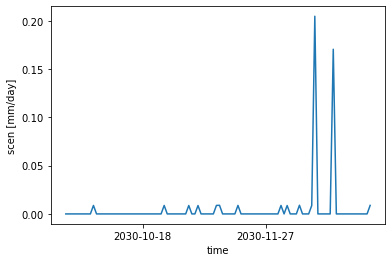

In [19]:
scen_single.plot()

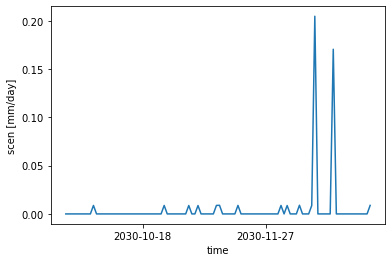

In [20]:
scen[-100:].plot()

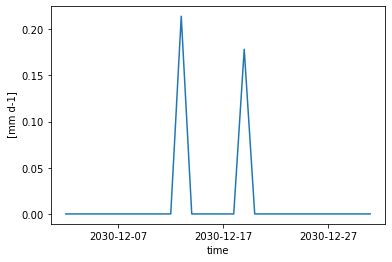

In [14]:
pr_sim[-30:].plot()

In [18]:
QM.ds

<xarray.Dataset>
Dimensions:    (quantiles: 15, group: 1)
Coordinates:
  * quantiles  (quantiles) float64 0.03333 0.1 0.1667 ... 0.8333 0.9 0.9667
  * group      (group) int64 1
Data variables:
    af         (group, quantiles) float64 0.9748 0.965 ... 2.196e+05 0.9546
    hist_q     (group, quantiles) float64 3.436e-07 3.505e-07 ... 0.2297
Attributes:
    group:               time
    group_compute_dims:  ['time']
    group_window:        1
    _xclim_adjustment:   {"py/object": "xclim.sdba.adjustment.EmpiricalQuanti...
    adj_params:          EmpiricalQuantileMapping(group=Grouper(name='time'),...

## 1. Open Data (to be adjusted)

In [3]:
path_general = r'/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data'
path_coeff = r'data/bias_correction'
season = 'DJF'

#### 1.1.1 Model

In [4]:
dt_model = xr.open_dataset(fr'{path_general}/cosmo/yearly/Tr011_MPI_RF_PR_{season}_1hr_1985.nc',
                     )

In [5]:
dt_model

<xarray.Dataset>
Dimensions:   (time: 2160, rlat: 107, rlon: 175)
Coordinates:
  * time      (time) datetime64[ns] 1985-01-01 ... 1985-12-31T23:00:00
    lon       (rlat, rlon) float32 ...
    lat       (rlat, rlon) float32 ...
  * rlon      (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
  * rlat      (rlat) float32 -6.2 -6.09 -5.98 -5.87 ... 5.13 5.24 5.35 5.46
Data variables:
    TOT_PREC  (time, rlat, rlon) float32 ...
Attributes: (12/13)
    CDI:                       Climate Data Interface version 1.9.10 (https:/...
    Conventions:               CF-1.4
    source:                    /home/yunal/cclm-sp-v3.1.1/src/cclm/cclm.exe}
    title:                     CCLM_v5.0_clm15 Simulation (0.11 Deg) with Med...
    experiment_id:             Tr0.11_RF
    realization:               1
    ...                        ...
    contact:                   Cemre Yuruk Sonuc (yurukc@itu.edu.tr)
    references:                http://www.clm-community.eu/
    creation_date:             2020-03-01 04:03:14
    nco_openmp_thread_number:  1
    history:                   Wed Dec 07 10:17:22 2022: cdo -select,season=D...
    CDO:                       Climate Data Operators version 1.9.10 (https:/...

In [6]:
np.unique(dt_model['time.month'].values)

array([ 1,  2, 12])

## 2. Adjust Model With Quantile Mapping

### 2.1 Open Coefficient Data

In [7]:
coeff = xr.open_dataset(fr'{path_coeff}/quantile_mapping_coefficients_{season}.nc')

In [8]:
coeff

<xarray.Dataset>
Dimensions:    (rlon: 175, rlat: 107, group: 1, quantiles: 15)
Coordinates:
  * rlon       (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
    lat        (rlat, rlon) float32 ...
    lon        (rlat, rlon) float32 ...
  * rlat       (rlat) float32 -6.2 -6.09 -5.98 -5.87 ... 5.13 5.24 5.35 5.46
  * quantiles  (quantiles) float64 0.03333 0.1 0.1667 ... 0.8333 0.9 0.9667
  * group      (group) int32 1
Data variables:
    af         (rlon, rlat, group, quantiles) float64 ...
    hist_q     (rlon, rlat, group, quantiles) float64 ...
Attributes:
    _xclim_adjustment:  {"py/object": "xclim.sdba.adjustment.EmpiricalQuantil...
    adj_params:         EmpiricalQuantileMapping(group=Grouper(name='time'), ...

In [9]:
QM = sdba.EmpiricalQuantileMapping.from_dataset(coeff)

In [10]:
QM

EmpiricalQuantileMapping(group=Grouper(name='time'), kind='*')

In [31]:
dt_model['TOT_PREC'][0]

<xarray.DataArray 'TOT_PREC' (rlat: 107, rlon: 175)>
array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 3.054737e-07,
        2.430702e-07, 8.456097e-07],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.481154e-06,
        9.694377e-07, 2.742446e-06]], dtype=float32)
Coordinates:
    time     datetime64[ns] 1985-01-01
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...
  * rlon     (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
  * rlat     (rlat) float32 -6.2 -6.09 -5.98 -5.87 -5.76 ... 5.13 5.24 5.35 5.46
Attributes:
    standard_name:  precipitation_amount
    long_name:      total precipitation amount
    units:          kg m-2
    cell_methods:   time: sum

### 2.2 Ajust Coefficient Data

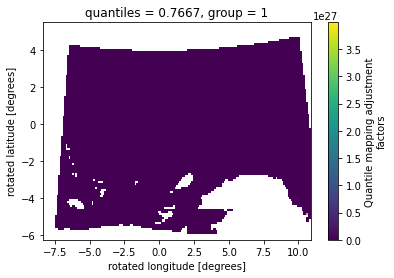

In [96]:
QM.ds.transpose('group', 'quantiles', 'rlat', 'rlon')['af'].squeeze()[-4, :, :].plot()

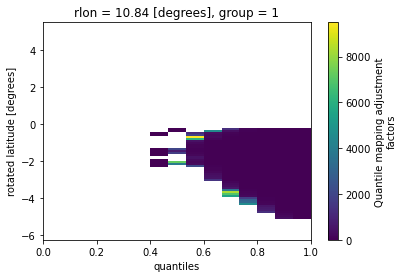

In [105]:
QM.ds['af'].where(QM.ds['af'] < 10000, np.nan).squeeze()[-1, :, :].plot()

In [106]:
xr.open_dataset(r'data/TOT_PREC/cosmo/cosmo_DJF_q99_1hr_198501_200512.nc')

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [58]:
dt_model_qm = QM.adjust(dt_model['TOT_PREC'][0:2], interp='linear')

/home/donmezk16/Downloads/anaconda3/envs/my_xclim_env/lib/python3.8/site-packages/xclim/sdba/utils.py:317: RuntimeWarning: All-NaN slice encountered in interp_on_quantiles
  warn(


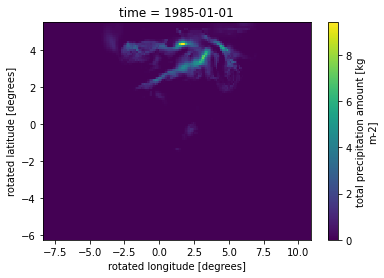

In [34]:
dt_model['TOT_PREC'][0].plot()

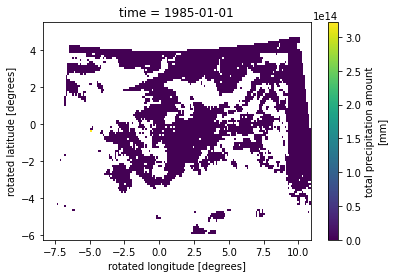

In [59]:
dt_model_qm.transpose('time', 'rlat', 'rlon')[0].plot()

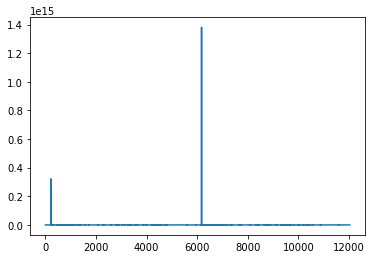

In [45]:
import matplotlib.pyplot as plt
plt.plot(dt_model_qm.values.flatten()[~np.isnan(dt_model_qm.values.flatten())])

In [20]:
dt_model_qm

<xarray.DataArray 'scen' (time: 2160, rlon: 175, rlat: 107)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * rlon     (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
  * rlat     (rlat) float32 -6.2 -6.09 -5.98 -5.87 -5.76 ... 5.13 5.24 5.35 5.46
  * time     (time) datetime64[ns] 1985-01-01 ... 1985-12-31T23:00:00
    lon      (rlat, rlon) float32 23.11 23.24 23.37 23.5 ... 47.92 48.08 48.23
    lat      (rlat, rlon) float32 33.34 33.35 33.36 33.38 ... 44.57 44.55 44.53
Attributes:
    standard_name:    precipitation_amount
    long_name:        total precipitation amount
    units:            mm
    cell_methods:     time: sum
    history:          [2023-01-17 14:48:56] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(name='time'), ki...

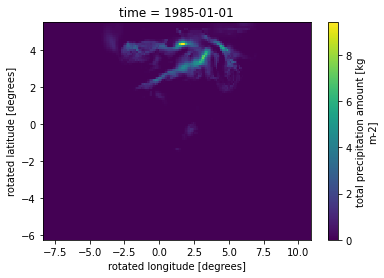

In [15]:
dt_model['TOT_PREC'][0].plot()

In [ ]:
from dask.diagnostics import ProgressBar

#delayed_obj = dt_model_qm.to_netcdf(fr"{path_general}/cosmo/BC_QM_Tr011_MPI_RF_PR_{season}_1hr_198501_200512.nc",
#                                       compute=False)

with ProgressBar():
    results = dt_model_qm.compute()

[####                                    ] | 12% Completed | 110.70 s

/home/donmezk16/Downloads/anaconda3/envs/my_xclim_env/lib/python3.8/site-packages/xclim/sdba/utils.py:317: RuntimeWarning: All-NaN slice encountered in interp_on_quantiles
  warn(


[#################                       ] | 43% Completed | 510.79 s